In [1]:
# hierarchical clustering 

In [2]:
import pandas as pd
import numpy as np
np.random.seed(27)

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

from sklearn.preprocessing import RobustScaler, StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stores = [3692, 2655, 4986, 2906, 2615, 4843, 4796]
cluster_labels = []
cluster_store = []
cluster_data = []
cluster_customers = []
cluster_score = []

In [5]:
cluster_labels = []
cluster_store = []
cluster_data = []
cluster_customers = []
cluster_score = []
for store in stores:

    
    profiles = pd.read_csv('store_' + str(store) + '.csv')

    cluster_customers.append(profiles['customerID'])
    profiles.drop('customerID', axis=1, inplace=True)
    
    rbs = RobustScaler()
    cld = rbs.fit_transform(profiles)
    print '0'
    Z = linkage(cld, 'ward')
    print '1'
    c, coph_dists = cophenet(Z, pdist(cld))
    print '2'
    print c
    
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.show()
    break

In [4]:
%%time
store = 2906
profiles = pd.read_csv('store_' + str(store) + '.csv')

cluster_customers.append(profiles['customerID'])
profiles.drop('customerID', axis=1, inplace=True)

rbs = RobustScaler()
cld = rbs.fit_transform(profiles)
print '0'
Z_2906 = linkage(cld, 'ward')
print '1'
'''
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()'''

0
1
Wall time: 2min 8s


In [5]:
%%time
store = 3692
profiles = pd.read_csv('store_' + str(store) + '.csv')

#cluster_customers.append(profiles['customerID'])
profiles.drop('customerID', axis=1, inplace=True)

rbs = RobustScaler()
cld = rbs.fit_transform(profiles)
print '0'
Z_3692 = linkage(cld, 'ward')
print '1'

0
1
Wall time: 6.92 s


In [6]:
%%time
store = 4986
profiles = pd.read_csv('store_' + str(store) + '.csv')

cluster_customers.append(profiles['customerID'])
profiles.drop('customerID', axis=1, inplace=True)

rbs = RobustScaler()
cld = rbs.fit_transform(profiles)
print '0'
Z_4986 = linkage(cld, 'ward')
print '1'

0
1
Wall time: 28.1 s


In [7]:
%%time
store = 2615
profiles = pd.read_csv('store_' + str(store) + '.csv')

cluster_customers.append(profiles['customerID'])
profiles.drop('customerID', axis=1, inplace=True)

rbs = RobustScaler()
cld = rbs.fit_transform(profiles)
print '0'
Z_2615 = linkage(cld, 'ward')
print '1'

0
1
Wall time: 8.48 s


In [8]:
%%time
store = 4843
profiles = pd.read_csv('store_' + str(store) + '.csv')

cluster_customers.append(profiles['customerID'])
profiles.drop('customerID', axis=1, inplace=True)

rbs = RobustScaler()
cld = rbs.fit_transform(profiles)
print '0'
Z_4843 = linkage(cld, 'ward')
print '1'

0
1
Wall time: 1min 15s


In [9]:
%%time
store = 4796
profiles = pd.read_csv('store_' + str(store) + '.csv')

cluster_customers.append(profiles['customerID'])
profiles.drop('customerID', axis=1, inplace=True)

rbs = RobustScaler()
cld = rbs.fit_transform(profiles)
print '0'
Z_4796 = linkage(cld, 'ward')
print '1'

0
1
Wall time: 1min 47s


In [10]:
%%time
store = 2655
profiles = pd.read_csv('store_' + str(store) + '.csv')

cluster_customers.append(profiles['customerID'])
profiles.drop('customerID', axis=1, inplace=True)

rbs = RobustScaler()
cld = rbs.fit_transform(profiles)
print '0'
Z_2655 = linkage(cld, 'ward')
print '1'

0
1
Wall time: 14min 30s


In [22]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

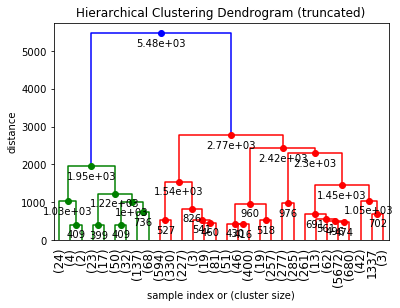

In [118]:
max_d = 500
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    #show_contracted=True,
    annotate_above=10,
    #max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [16]:
k=60
res = list(fcluster(Z_2655, k, criterion='maxclust'))

In [17]:
for i in range(1,61):
    print i, res.count(i)

1 918
2 1
3 25
4 12
5 6
6 93
7 207
8 175
9 3
10 19
11 242
12 163
13 522
14 66
15 4
16 6
17 1
18 20
19 20
20 93
21 147
22 74
23 573
24 171
25 90
26 349
27 684
28 774
29 1170
30 81
31 559
32 2396
33 573
34 255
35 17
36 1085
37 51
38 1382
39 2183
40 451
41 28251
42 8
43 3
44 29
45 8
46 64
47 340
48 283
49 705
50 18
51 166
52 4
53 34
54 28
55 120
56 6
57 33
58 166
59 14
60 106


In [21]:
indices = [i for i, x in enumerate(res) if x == 29]

In [22]:
len(indices)

1170

In [23]:
profiles.iloc[indices].mean(axis=0)

Gender                                             0.744444
BBProfitClub_sum                                   0.102564
BBSavingsClub_sum                                  0.000000
EldersClub_sum                                     0.000000
FGShoppingFest_sum                                 0.246154
Payback_sum                                       36.896581
T24Club_sum                                        0.621368
number_of_times_promo_used                         8.367521
home_needs_sum                                     3.355556
groceries_sum                                     15.032479
fruits_and_vegetables_sum                          5.403419
beverages_sum                                      0.759829
dairy_and_bread_sum                                0.784615
baby_care_sum                                      0.194017
personal_care_sum                                  3.252137
female_sanitary_needs_sum                          0.176923
men_shaving_needs_sum                   

In [151]:
profiles.iloc[indices].mean(axis=0)

Gender                                                0.832117
BBProfitClub_sum                                    162.131387
BBSavingsClub_sum                                     0.000000
EldersClub_sum                                        0.000000
FGShoppingFest_sum                                    0.000000
Payback_sum                                          62.131387
T24Club_sum                                           2.788321
number_of_times_promo_used                           50.277372
home_needs_sum                                       13.452555
groceries_sum                                        83.642336
fruits_and_vegetables_sum                            22.372263
beverages_sum                                         6.218978
dairy_and_bread_sum                                   3.065693
baby_care_sum                                         0.481752
personal_care_sum                                    10.897810
female_sanitary_needs_sum                             0

In [149]:
list(profiles.columns)

['Gender',
 'BBProfitClub_sum',
 'BBSavingsClub_sum',
 'EldersClub_sum',
 'FGShoppingFest_sum',
 'Payback_sum',
 'T24Club_sum',
 'number_of_times_promo_used',
 'home_needs_sum',
 'groceries_sum',
 'fruits_and_vegetables_sum',
 'beverages_sum',
 'dairy_and_bread_sum',
 'baby_care_sum',
 'personal_care_sum',
 'female_sanitary_needs_sum',
 'men_shaving_needs_sum',
 'kids_items',
 'clothes_and_others_sum',
 'age',
 'from_different_state',
 'total_number_of_customers_from_this_pincode',
 'avg_sale_price_after_promo',
 'number_of_purchases',
 'number_of_purchases_by customer',
 'avg_purchase_amount',
 'customers_mean_purchase_amount_part_in_area',
 'customers_mean_number_purchase_part_in_area',
 'number_of_months_customer_shopped',
 'mean_number_of_times_customer_shops_per_month',
 'is_married',
 'have_kids',
 'hindu',
 'islam',
 'christian',
 'sikh',
 'CASH',
 'PCLB',
 'EDCUBI',
 'EDCSBI',
 'EDCHDFC',
 'EDCICICI',
 'EDCAXIS',
 'PYOC',
 'GVOWN',
 'FUTP',
 'FGSC',
 'CSBK',
 'MVSODEXHO',
 'CR_